In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import conda_installer
from rdkit import Chem
from deepchem.feat.graph_features import atom_features as get_atom_features
import rdkit
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2025-04-30 23:51:02.600895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-30 23:51:02.672955: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normaliz

In [2]:
PDBs = pickle.load(open('Datasets/PDBs_RDKit_BFE.pkl', 'rb'))
df = pd.read_csv('Datasets/Final_data_DDG.csv')

In [13]:
df

,Unnamed: 0,Ids,pb_host_VDWAALS,pb_guest_VDWAALS,pb_complex_VDWAALS,gb_host_1-4EEL,gb_guest_1-4EEL,gb_Complex_1-4EEL,gb_host_EELEC,gb_guest_EELEC,gb_Complex_EELEC,gb_host_EGB,gb_guest_EGB,gb_Complex_EGB,gb_host_ESURF,gb_guest_ESURF,gb_Complex_ESURF,Ex _G_(kcal/mol)
0,0,cd-set1--acd-guest-1,-28.5717,-0.0564,-40.2895,423.5761,12.2487,435.8248,-428.9520,16.4764,-402.7811,-96.4471,-67.4372,-162.2809,5.1691,1.4344,4.9718,1.575
1,1,cd-set1--acd-guest-2,-27.1334,-0.3831,-44.0766,412.6663,16.3135,428.9798,-397.9784,11.5637,-376.0288,-106.4154,-66.7869,-176.4630,5.0726,1.7438,4.9888,3.533
2,2,cd-set1--acd-guest-3,-29.0930,-0.6493,-48.7146,426.2925,16.8092,443.1017,-429.3068,11.3698,-410.1856,-95.2452,-66.0578,-163.6184,5.1352,2.0628,5.3270,4.606
3,3,cd-set1--acd-guest-4,-29.6231,-0.0159,-43.0228,420.0687,-30.3678,389.7009,-416.5215,11.2809,-405.0136,-97.4461,-8.8723,-102.2474,5.0849,1.3330,4.9451,2.130
4,4,cd-set1--acd-guest-5,-28.8169,-0.9041,-46.8309,425.7315,-10.9172,414.8143,-435.9689,5.6626,-431.7111,-91.2312,-7.8776,-93.5205,5.0881,1.5514,5.0142,2.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,sampl6-CB8-8,-49.0064,3.3647,-70.6721,-2832.4453,-22.8929,-2855.3382,1726.3218,45.4060,1699.7389,-175.2083,-60.6497,-160.1198,6.2084,2.1236,5.6790,13.500
68,68,sampl6-CB8-9,-49.0064,-0.6967,-65.7360,-2832.4453,-50.2550,-2888.7892,1726.3218,57.0318,1711.3958,-175.5746,-59.1104,-160.3890,6.2230,1.6581,5.7092,8.680
69,69,sampl6-CB8-10,-49.0064,-2.4011,-75.9690,-2832.4453,-146.1591,-2978.6044,1726.3218,125.2640,1777.4060,-175.4034,-65.4112,-161.5333,6.2481,1.7718,5.6932,8.220
70,70,sampl6-CB8-11,-49.0064,-1.0304,-70.6514,-2832.4453,-45.4193,-2877.8646,1726.3218,157.8995,1743.1452,-175.3479,-200.3369,-224.9155,6.2942,1.6177,5.9772,7.770


In [4]:
info = []
for pdb in list(PDBs.keys()):
    info.append(df[df['Ids'] == pdb][['pb_host_VDWAALS', 'pb_guest_VDWAALS', 'pb_complex_VDWAALS', 'gb_host_1-4EEL', 'gb_guest_1-4EEL', 'gb_Complex_1-4EEL',
       'gb_host_EELEC', 'gb_guest_EELEC', 'gb_Complex_EELEC', 'gb_host_EGB', 'gb_guest_EGB', 'gb_Complex_EGB', 'gb_host_ESURF', 'gb_guest_ESURF', 'gb_Complex_ESURF']].to_numpy()[0])


In [5]:
from models.dcFeaturizer import atom_features as get_atom_features
def featurize(molecule, info):
    atom_features = []
    for atom in molecule.GetAtoms():
        new_feature = get_atom_features(atom).tolist()
        position = molecule.GetConformer().GetAtomPosition(atom.GetIdx())
        new_feature += [atom.GetMass(), atom.GetAtomicNum(), atom.GetFormalCharge()]
        new_feature += [position.x, position.y, position.z]
        for neighbor in atom.GetNeighbors()[:2]:
            neighbor_idx = neighbor.GetIdx()
            new_feature += [neighbor_idx]
        for i in range(2 - len(atom.GetNeighbors())):
            new_feature += [-1]
        atom_features.append(np.concatenate([new_feature, info], 0))
    return np.array(atom_features)

In [6]:
X = []
y = []
for i, pdb in enumerate(list(PDBs.keys())):
    X.append(featurize(PDBs[pdb], info[i]))
    y.append(df[df['Ids'] == pdb]['Ex _G_(kcal/mol)'].to_numpy()[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X[0].shape

(71, 53)

In [8]:
len(X_train), len(X_test), len(y_train), len(y_test)

(57, 15, 57, 15)

In [9]:
import models.layers_update_mobley as layers
import importlib
importlib.reload(layers)
import keras.backend as K

from tensorflow.keras.callbacks import EarlyStopping

class PGGCNModel(tf.keras.Model):
    def __init__(self, num_atom_features = 36, r_out_channel = 20, c_out_channel = 128):
        super().__init__()
        self.ruleGraphConvLayer = layers.RuleGraphConvLayer(r_out_channel, num_atom_features, 0)
        self.ruleGraphConvLayer.combination_rules = []
        self.conv = layers.ConvLayer(c_out_channel)
        self.dense1 = tf.keras.layers.Dense(32, activation='relu', name='dense1')
        self.dense5 = tf.keras.layers.Dense(16, name='relu')
        self.dense6 = tf.keras.layers.Dense(1, name='dense6')
        self.dense7 = tf.keras.layers.Dense(1, name='dense7',
                 kernel_initializer=tf.keras.initializers.Constant([.3, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1]),
                 bias_initializer=tf.keras.initializers.Zeros())
        self.all_layer_1_weights = []
        
    def addRule(self, rule, start_index, end_index = None):
        self.ruleGraphConvLayer.addRule(rule, start_index, end_index)
    
    def set_input_shapes(self, i_s):
        self.i_s = i_s

    def call(self, inputs):
        physics_info = inputs[:,0,38:]
        x_a = []
        for i in range(len(self.i_s)):
            x_a.append(inputs[i][:self.i_s[i], :38])
        x = self.ruleGraphConvLayer(x_a)
        self.all_layer_1_weights.append(self.ruleGraphConvLayer.w_s)
        x = self.conv(x)
        x = self.dense1(x)
        x = self.dense5(x)
        model_var = self.dense6(x)
        merged = tf.concat([model_var, physics_info], axis=1)
        out = self.dense7(merged)
        return out
       
class LossComponentsCallback(tf.keras.callbacks.Callback):
    def __init__(self,model_instance):
        super().__init__()
        self.total_losses = []
        self.model = model_instance
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        lr = self.model.optimizer.learning_rate
        self.total_losses.append(logs.get('loss'))

m = PGGCNModel()
m.addRule("sum", 0, 32)
m.addRule("multiply", 32, 33)
m.addRule("distance", 33, 36)


def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred[0] - y_true))) + K.abs(1 / K.mean(.2 + y_pred[1]))
def pure_rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
m.compile(loss=pure_rmse, optimizer=opt)


input_shapes = []
for i in range(len(X_train)):
    input_shapes.append(np.array(X_train[i]).shape[0])
m.set_input_shapes(input_shapes)
for i in range(len(X_train)):
    if X_train[i].shape[0] < 2000:
        new_list = np.zeros([2000 - X_train[i].shape[0], 53])
        X_train[i] = np.concatenate([X_train[i], new_list], 0)
X_train = np.array(X_train)
y_train = np.array(y_train)

loss_tracker = LossComponentsCallback(m)

early_stop = EarlyStopping(
monitor='loss',           
patience=20,              
restore_best_weights=True, 
min_delta=0.001,          
verbose=1                 
)
hist = m.fit(X_train, y_train, epochs = 800, batch_size=len(X_train), callbacks=[early_stop,loss_tracker])

Epoch 1/800


2025-04-30 23:51:31.239837: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-30 23:51:31.239871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (curie.cluster): /proc/driver/nvidia/version does not exist
2025-04-30 23:51:31.240616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
1/1 [==============================] - 52s 52s/step - loss: 8.9546
Epoch 2/800
1/1 [==============================] - 1s 788ms/step - loss: 20.5028
Epoch 3/800
1/1 [==============================] - 1s 706ms/step - loss: 11.6360
Epoch 4/800
1/1 [==============================] - 1s 587ms/step - loss: 9.5780
Epoch 5/800
1/1 [==============================] - 1s 821ms/step - loss: 12.6862
Epoch 6/800
1/1 [==============================] - 1s 828ms/step - loss: 10.5550
Epoch 7/800
1/1 [==============================] - 1s 793ms/step - loss: 5.7950
Epoch 8/800
1/1 [==============================] - 1s 795ms/step - loss: 7.4518
Epoch 9/800
1/1 [==============================] - 1s 832ms/step - loss: 9.6818
Epoch 10/800
1/1 [==============================] - 1s 823ms/step - loss: 8.2194
Epoch 1

1/1 [==============================] - 1s 799ms/step - loss: 3.4349
Epoch 97/800
1/1 [==============================] - 1s 807ms/step - loss: 3.4319
Epoch 98/800
1/1 [==============================] - 1s 835ms/step - loss: 3.4297
Epoch 99/800
1/1 [==============================] - 1s 814ms/step - loss: 3.4262
Epoch 100/800
1/1 [==============================] - 1s 805ms/step - loss: 3.4239
Epoch 101/800
1/1 [==============================] - 1s 823ms/step - loss: 3.4209
Epoch 102/800
1/1 [==============================] - 1s 794ms/step - loss: 3.4181
Epoch 103/800
1/1 [==============================] - 1s 822ms/step - loss: 3.4154
Epoch 104/800
1/1 [==============================] - 1s 835ms/step - loss: 3.4128
Epoch 105/800
1/1 [==============================] - 1s 824ms/step - loss: 3.4098
Epoch 106/800
1/1 [==============================] - 1s 830ms/step - loss: 3.4075
Epoch 107/800
1/1 [==============================] - 1s 792ms/step - loss: 3.4045
Epoch 108/800
1/1 [==============

1/1 [==============================] - 1s 815ms/step - loss: 3.2058
Epoch 197/800
1/1 [==============================] - 1s 785ms/step - loss: 3.2039
Epoch 198/800
1/1 [==============================] - 1s 792ms/step - loss: 3.2021
Epoch 199/800
1/1 [==============================] - 1s 799ms/step - loss: 3.2002
Epoch 200/800
1/1 [==============================] - 1s 793ms/step - loss: 3.1984
Epoch 201/800
1/1 [==============================] - 1s 784ms/step - loss: 3.1966
Epoch 202/800
1/1 [==============================] - 1s 777ms/step - loss: 3.1947
Epoch 203/800
1/1 [==============================] - 1s 785ms/step - loss: 3.1929
Epoch 204/800
1/1 [==============================] - 1s 804ms/step - loss: 3.1911
Epoch 205/800
1/1 [==============================] - 1s 833ms/step - loss: 3.1893
Epoch 206/800
1/1 [==============================] - 1s 834ms/step - loss: 3.1874
Epoch 207/800
1/1 [==============================] - 1s 800ms/step - loss: 3.1856
Epoch 208/800
1/1 [===========

1/1 [==============================] - 1s 761ms/step - loss: 3.0463
Epoch 297/800
1/1 [==============================] - 1s 824ms/step - loss: 3.0450
Epoch 298/800
1/1 [==============================] - 1s 818ms/step - loss: 3.0437
Epoch 299/800
1/1 [==============================] - 1s 862ms/step - loss: 3.0423
Epoch 300/800
1/1 [==============================] - 1s 839ms/step - loss: 3.0409
Epoch 301/800
1/1 [==============================] - 1s 886ms/step - loss: 3.0395
Epoch 302/800
1/1 [==============================] - 1s 813ms/step - loss: 3.0382
Epoch 303/800
1/1 [==============================] - 1s 790ms/step - loss: 3.0369
Epoch 304/800
1/1 [==============================] - 1s 819ms/step - loss: 3.0355
Epoch 305/800
1/1 [==============================] - 1s 790ms/step - loss: 3.0342
Epoch 306/800
1/1 [==============================] - 1s 793ms/step - loss: 3.0329
Epoch 307/800
1/1 [==============================] - 1s 791ms/step - loss: 3.0315
Epoch 308/800
1/1 [===========

1/1 [==============================] - 1s 791ms/step - loss: 3.1594
Epoch 397/800
1/1 [==============================] - 1s 784ms/step - loss: 3.2107
Epoch 398/800
1/1 [==============================] - 1s 810ms/step - loss: 3.1760
Epoch 399/800
1/1 [==============================] - 1s 791ms/step - loss: 3.0901
Epoch 400/800
1/1 [==============================] - 1s 817ms/step - loss: 3.0162
Epoch 401/800
1/1 [==============================] - 1s 755ms/step - loss: 2.9729
Epoch 402/800
1/1 [==============================] - 1s 747ms/step - loss: 2.9516
Epoch 403/800
1/1 [==============================] - 1s 776ms/step - loss: 2.9417
Epoch 404/800
1/1 [==============================] - 1s 794ms/step - loss: 2.9371
Epoch 405/800
1/1 [==============================] - 1s 746ms/step - loss: 2.9348
Epoch 406/800
1/1 [==============================] - 1s 801ms/step - loss: 2.9335
Epoch 407/800
1/1 [==============================] - 1s 774ms/step - loss: 2.9330
Epoch 408/800
1/1 [===========

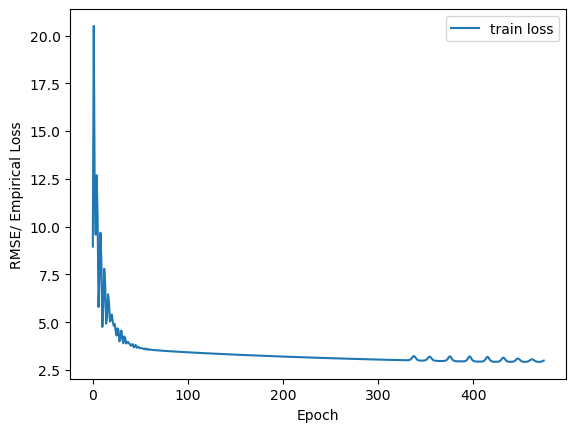

In [10]:
import matplotlib.pyplot as plt

# hist is the History object returned by .fit()
plt.plot(hist.history['loss'], label='train loss')

plt.xlabel('Epoch')
plt.ylabel('RMSE/ Empirical Loss')
plt.legend()
plt.show()


In [11]:
import copy
input_shapes = []
for i in range(len(X_test)):
    input_shapes.append(np.array(X_test[i]).shape[0])
m.set_input_shapes(input_shapes)

for i in range(len(X_test)):
    if X_test[i].shape[0] < 2000:
        new_list = np.zeros([2000 - X_test[i].shape[0], 53])
        X_test[i] = np.concatenate([X_test[i], new_list], 0)
X_test = np.array(X_test)
x_c = copy.deepcopy(X_test)
y_test = np.array(y_test)
y_pred_test = m.predict(X_test) 
y_pred_test = np.array(y_pred_test)

y_difference = np.mean(np.abs(np.abs(y_test) - np.abs(y_pred_test)))
eval = m.evaluate(X_test, y_test)
print("The mean absolute difference between y_tru & y_pred is : {}" .format(str(y_difference)))
print(y_pred_test)
print(y_test)


1/1 [==============================] - 6s 6s/step - loss: 3.6214
The mean absolute difference between y_tru & y_pred is : 2.9768648748948836
[[ 7.1878324 ]
 [12.177823  ]
 [ 1.9799467 ]
 [ 0.53103316]
 [ 4.1984525 ]
 [11.24899   ]
 [-0.82419145]
 [ 3.0231595 ]
 [ 4.292935  ]
 [ 5.2848783 ]
 [ 6.735501  ]
 [-2.9231296 ]
 [-2.3748507 ]
 [ 6.320645  ]
 [-1.6870455 ]]
[3.597 4.97  2.13  2.022 3.394 4.52  1.506 1.458 2.51  5.04  3.72  1.554
 1.575 4.73  3.344]


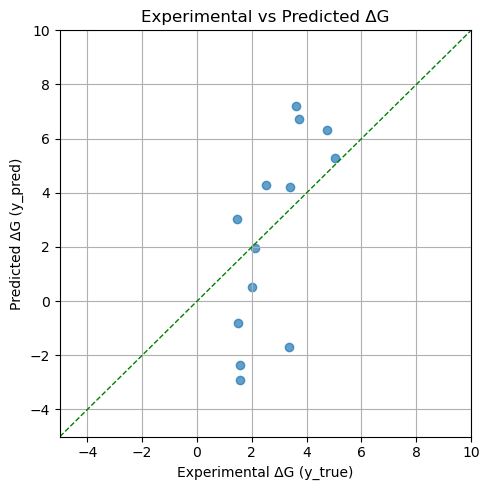

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title("Experimental vs Predicted ΔG")
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.xlabel("Experimental ΔG (y_true)")
plt.ylabel("Predicted ΔG (y_pred)")
plt.xlim(-5,10)
plt.ylim(-5, 10)

# Reference y = x line
plt.plot([-5, 10], [-5, 10], color='green', lw=1, linestyle='--')

plt.grid(True)
plt.tight_layout()
plt.show()